In [2]:
import pandas as pd 
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [37]:
df=pd.read_csv('flip_house_price_train.csv')

In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [39]:
df.shape

(1168, 81)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [41]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [42]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [43]:
# This shows the percentage of naan values in the columns 


col_with_na=[col for col in df.columns if df[col].isnull().sum()>1]

for col in col_with_na:
    print(col,np.round(df[col].isnull().mean(),4),'% missing values')

LotFrontage 0.1832 % missing values
Alley 0.9341 % missing values
MasVnrType 0.006 % missing values
MasVnrArea 0.006 % missing values
BsmtQual 0.0257 % missing values
BsmtCond 0.0257 % missing values
BsmtExposure 0.0265 % missing values
BsmtFinType1 0.0257 % missing values
BsmtFinType2 0.0265 % missing values
FireplaceQu 0.4717 % missing values
GarageType 0.0548 % missing values
GarageYrBlt 0.0548 % missing values
GarageFinish 0.0548 % missing values
GarageQual 0.0548 % missing values
GarageCond 0.0548 % missing values
PoolQC 0.994 % missing values
Fence 0.7971 % missing values
MiscFeature 0.9623 % missing values


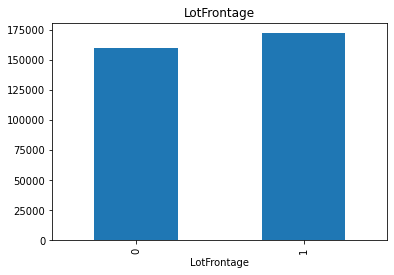

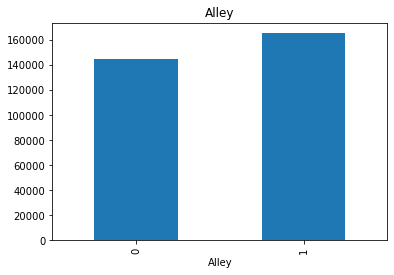

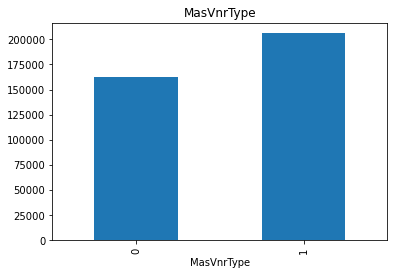

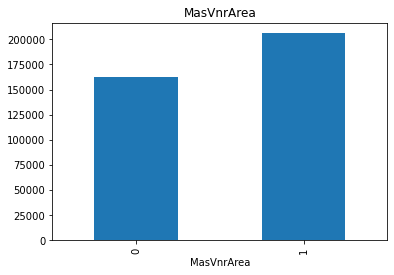

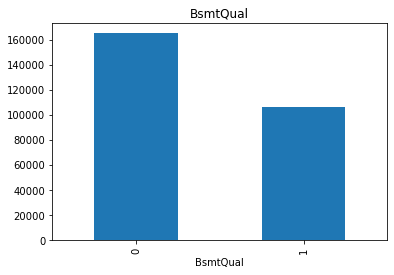

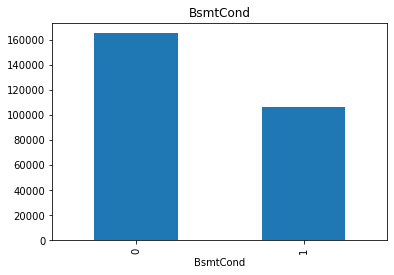

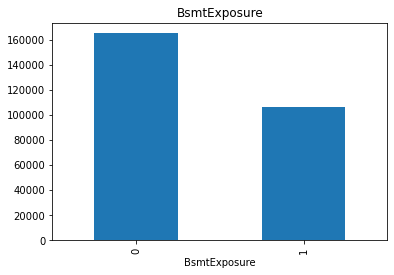

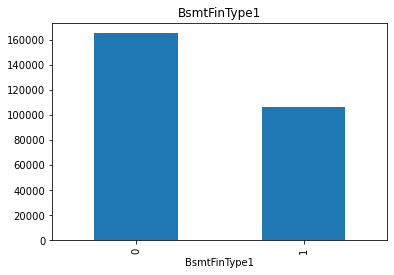

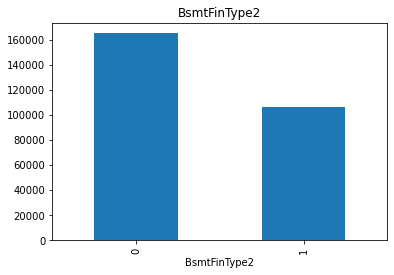

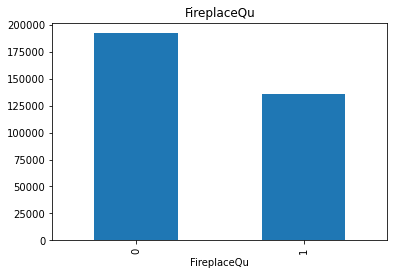

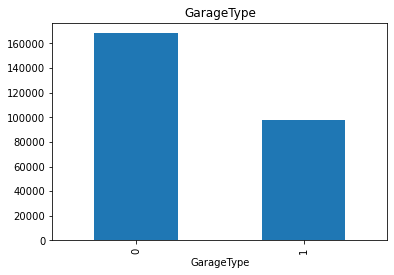

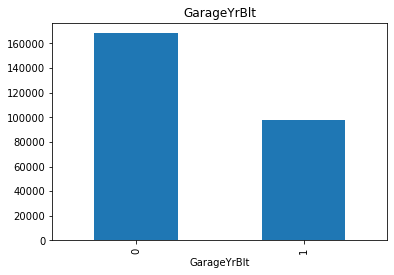

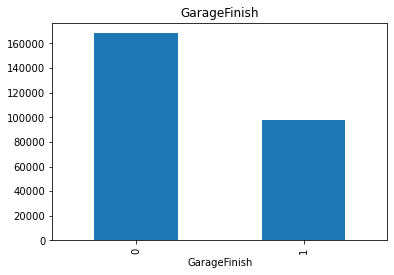

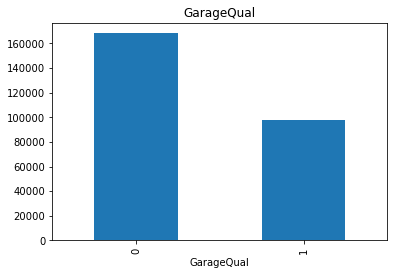

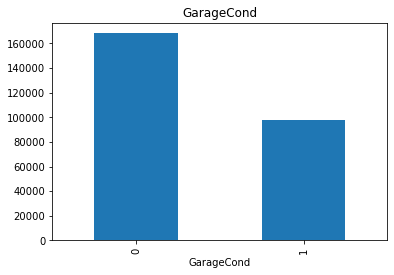

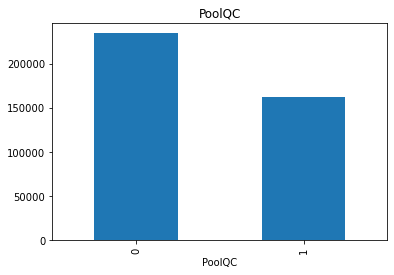

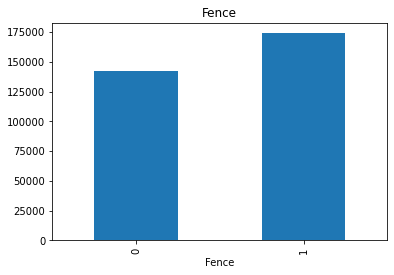

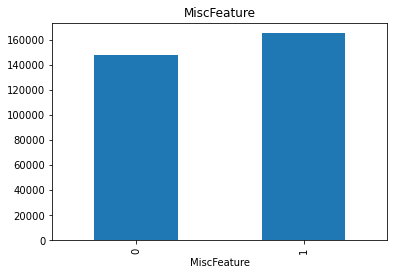

In [44]:
# here i will plot the count plot ,we will observe the relation between the naan values and the price so we can figure out 
# should we drop the features or not by finding the relation between missing value and price 
# i am making a variable that shows missing value as 1 and non null as 0 ,so we can get a count plot
for column in col_with_na:
    data=df.copy()
    
    data[column]=np.where(data[column].isnull(), 1 ,0)
    
    data.groupby(column)['SalePrice'].median().plot.bar()
    
    plt.title(column)
    
    plt.show()
    
    


In [45]:
# we can observe that where ever there are naan values the price are high 
# so it playing the major role , we have a relation here 

In [46]:
# we have id column we can drop this later 

print('id of house {}'.format(len(df.Id)))

id of house 1168


In [47]:
# we will find out how many features are of numerical values 


numeric_columns=[column for column in df.columns if df[column].dtypes !='O']

print('number of numerical features', len(numeric_columns))

df[numeric_columns].head()

number of numerical features 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,0,958,1078,958,0,0,958,0,0,2,0,2,1,5,1,1977.0,2,440,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,823,1043,2217,2217,0,0,2217,1,0,2,0,4,1,8,1,1970.0,2,621,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,0,255,1117,1127,886,0,2013,1,0,2,1,3,1,8,1,1997.0,2,455,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,0,1139,1844,1844,0,0,1844,0,0,2,0,3,1,7,1,1977.0,2,546,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,0,356,1602,1602,0,0,1602,0,1,2,0,3,1,8,1,1977.0,2,529,240,0,0,0,0,0,0,6,2009,215000


In [48]:
# we have 4 year columns herre with year or with yr 

In [49]:
year_column=[column for column in numeric_columns if 'Yr' in column or 'Year' in column ]

print(year_column)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


Text(0, 0.5, 'sale price ')

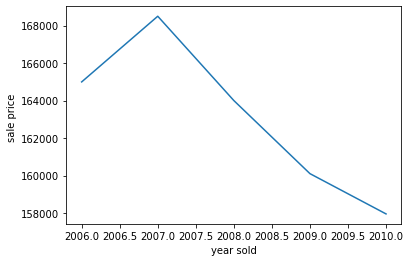

In [50]:
# i will try to find out if there is relation between the yr sold and the price 


df.groupby('YrSold')['SalePrice'].median().plot()

plt.xlabel('year sold')
plt.ylabel('sale price ')

In [51]:
# we can see that with time the price has decrese ,this is strange bacuse ,genrally with time the price increse of the property 

In [52]:
# now in numeric features i will try to find the discreate features 

discrete_column=[column for column in numeric_columns if len(df[column].unique())<25 and column not in year_column+['Id']]

print('discrete feature {}'.format (len(discrete_column)))

discrete feature 17


In [53]:
discrete_column

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

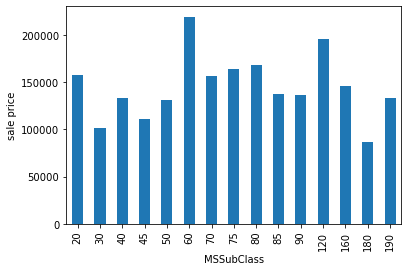

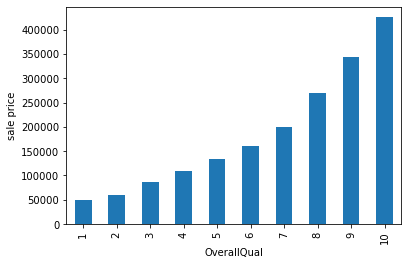

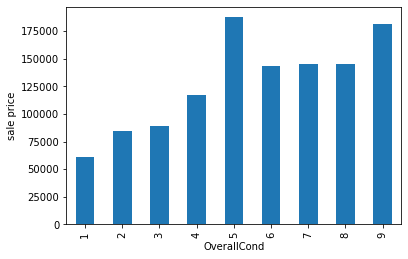

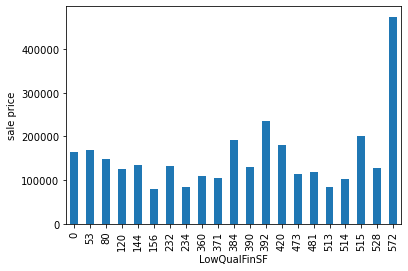

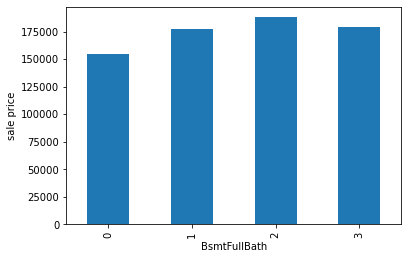

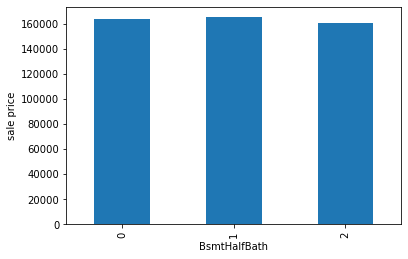

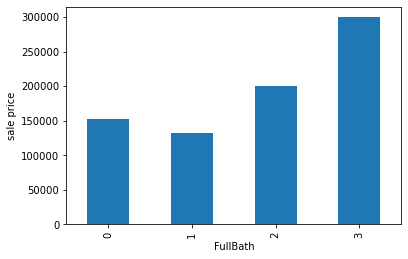

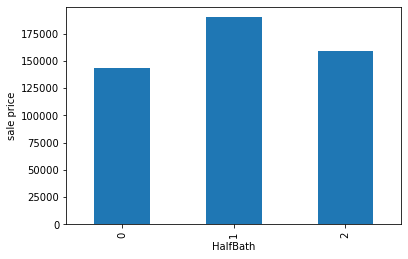

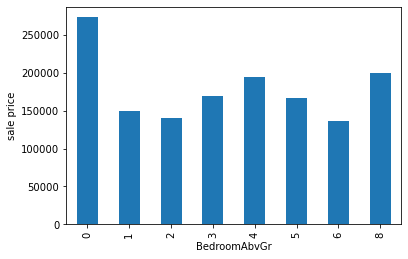

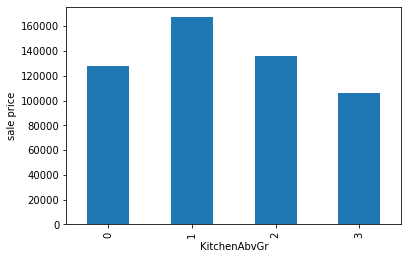

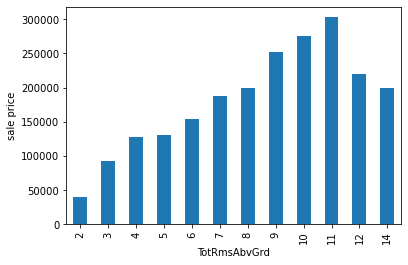

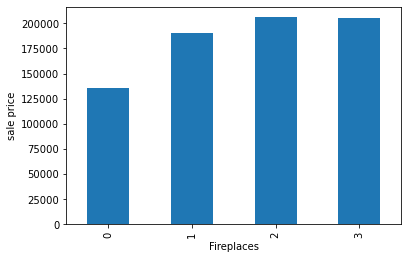

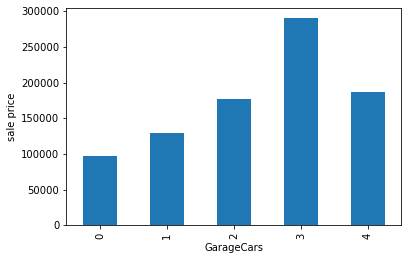

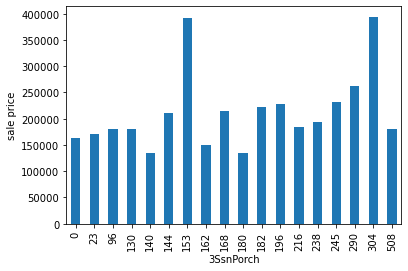

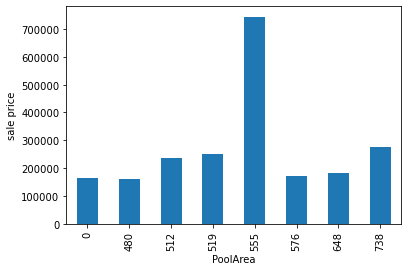

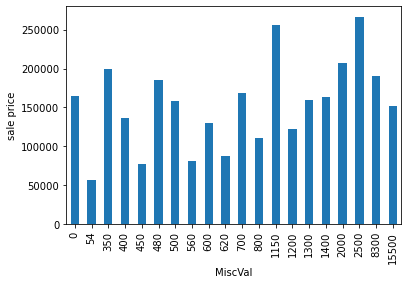

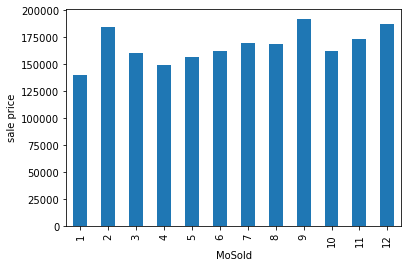

In [54]:
# we will fidnout the relation between discrete features and sales price 



for column in discrete_column:
    data=df.copy()
    
    data.groupby(column)['SalePrice'].median().plot.bar()
   
    plt.xlabel(column)
    plt.ylabel('sale price')
    plt.show()

In [55]:
# we can observe that when the overll quality increses the price is incrising ,it has exponential rise or monotonic relation 

In [56]:
# lets find out the relation for the continous variables with sales price 


cont_variable=[column for column in numeric_columns if column not in discrete_column +year_column+['Id']]

print('number of continous variable {}'.format(len(cont_variable)))

number of continous variable 16


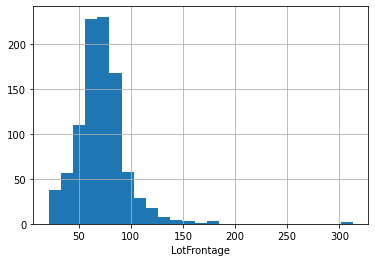

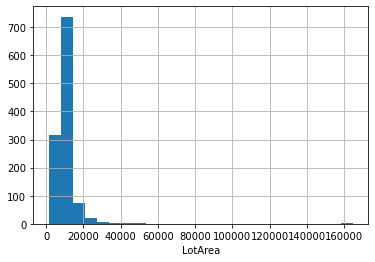

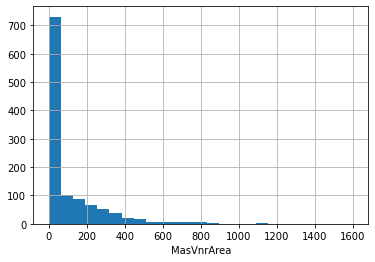

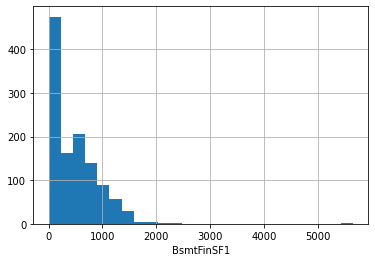

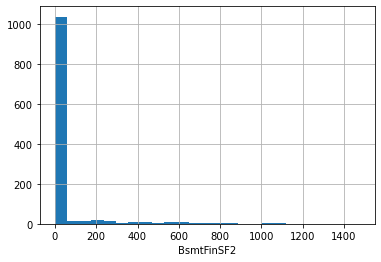

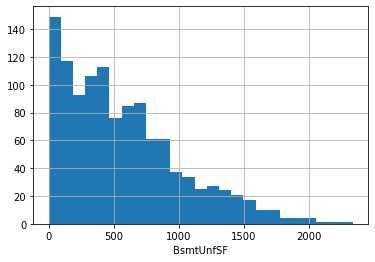

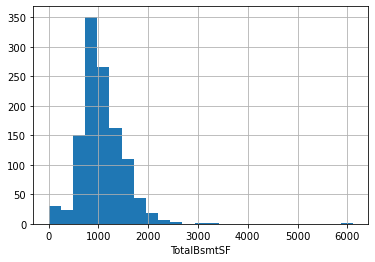

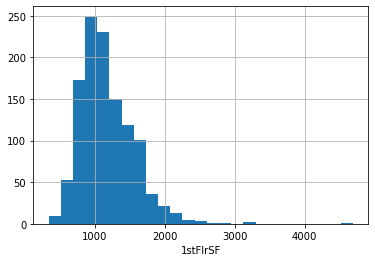

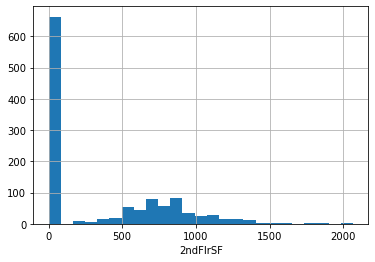

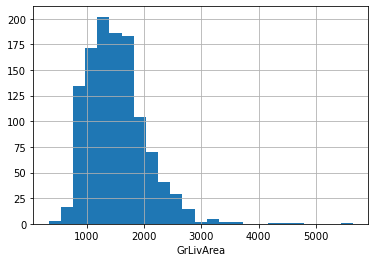

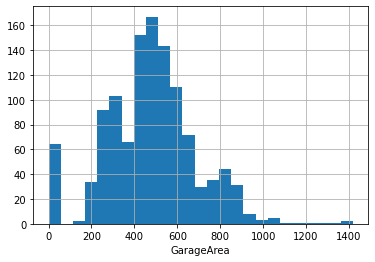

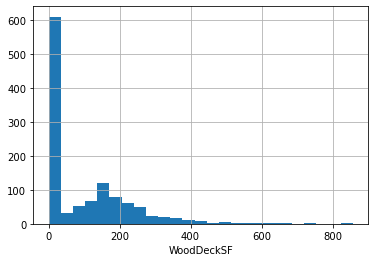

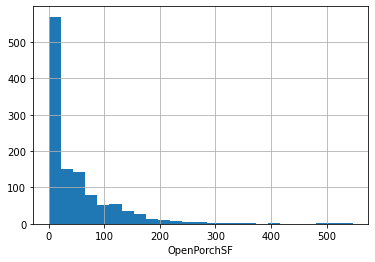

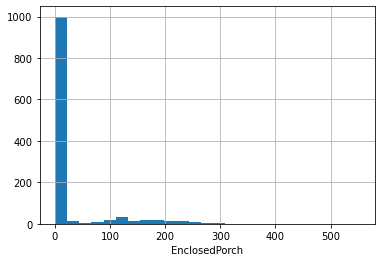

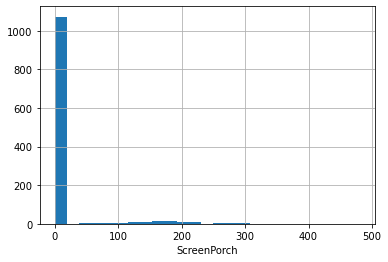

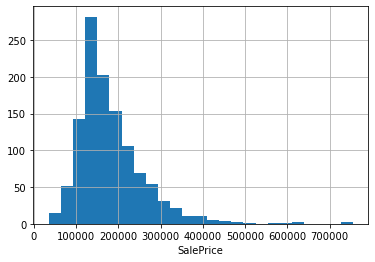

In [57]:
# as these are continous variable so we will find out the distribution of them through histograms

for column in cont_variable:
    data=df.copy()
    data[column].hist(bins=25)
    plt.xlabel(column)
    plt.show()

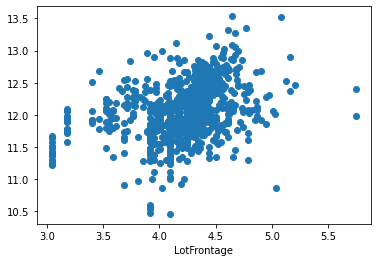

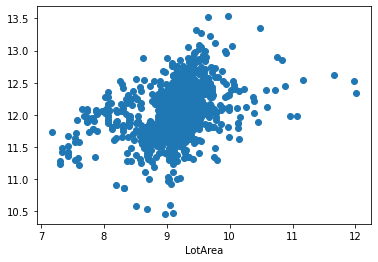

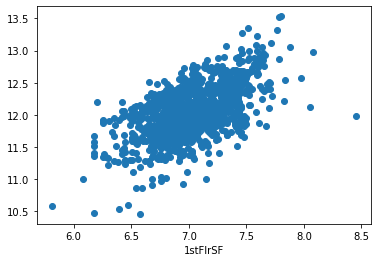

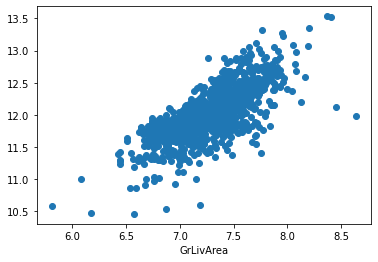

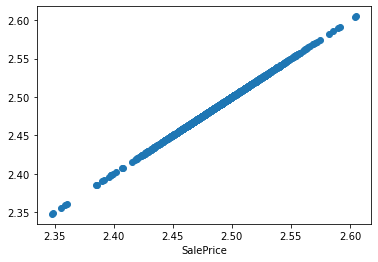

In [58]:
# we can observe that there is skewness in the data ,we will use log transformation 
# then i will plot the graphs 


for column in cont_variable:
    data=df.copy()
    
    if 0 in data[column].unique():
        pass
    else:
        data[column]=np.log(data[column])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[column],data['SalePrice'])
        plt.xlabel(column)
        plt.show()
        

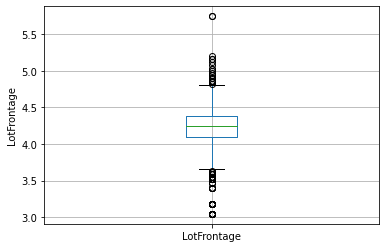

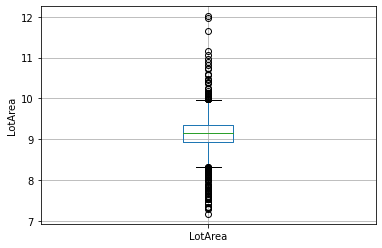

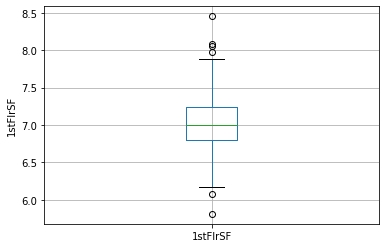

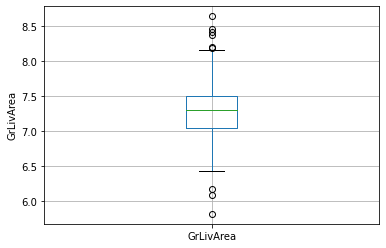

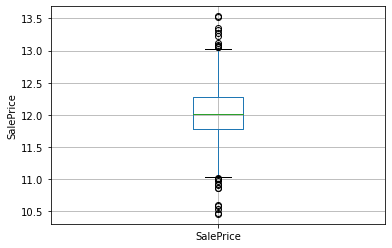

In [59]:
# check outliers 

for column in cont_variable:
    data=df.copy()
    
    if 0 in data[column].unique():
        pass
    else:
        data[column]=np.log(data[column])
        data.boxplot(column=column)
        
        plt.ylabel(column)
        plt.show()


In [60]:
## we find out the categorical features 


cat_features=[feature for feature in df.columns if df[feature].dtypes=='O']

cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

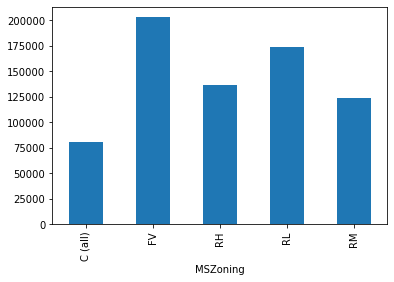

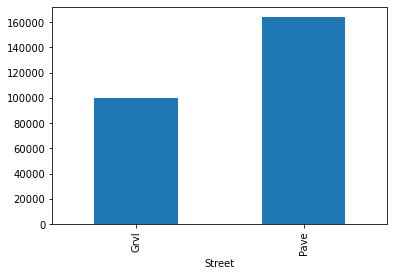

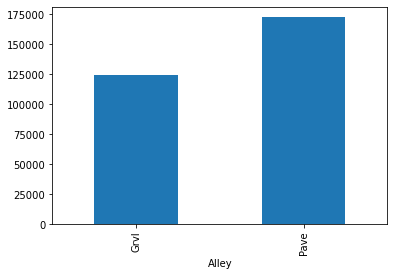

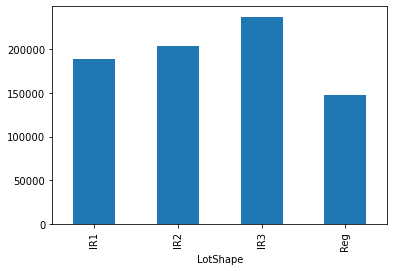

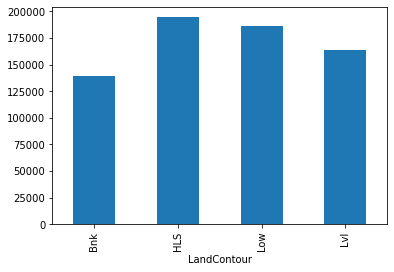

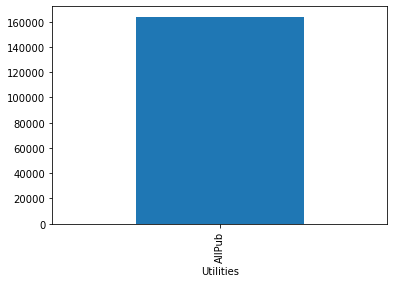

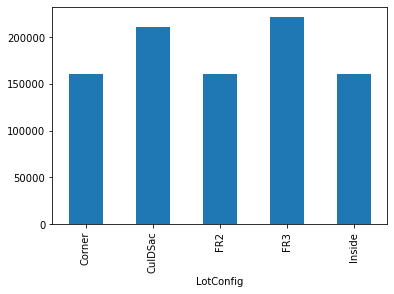

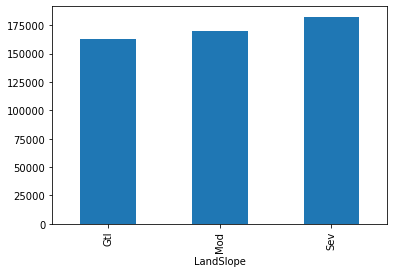

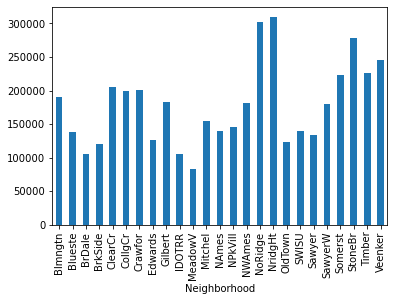

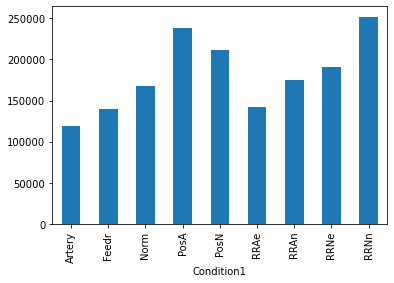

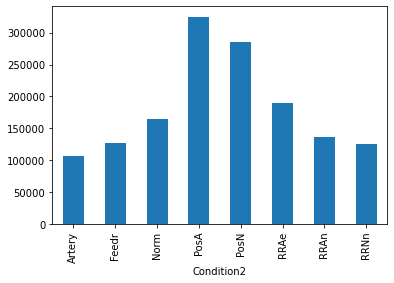

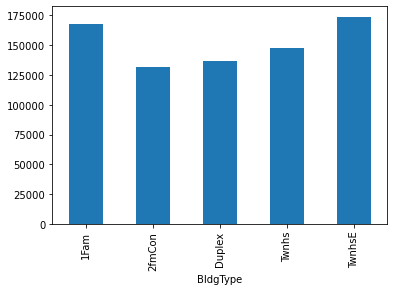

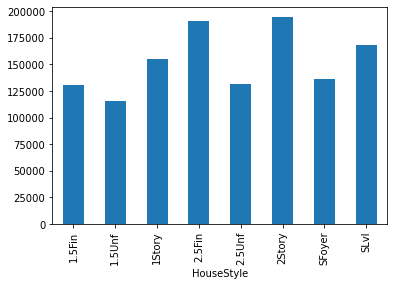

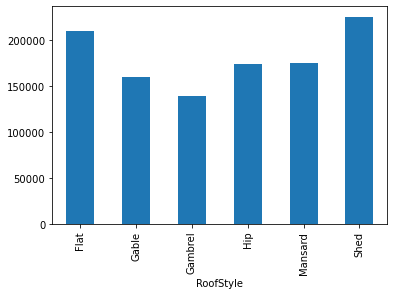

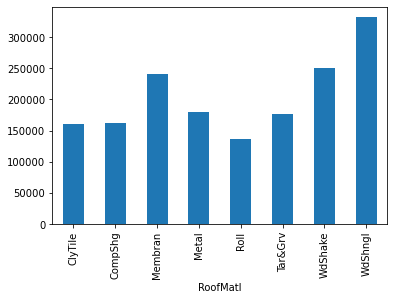

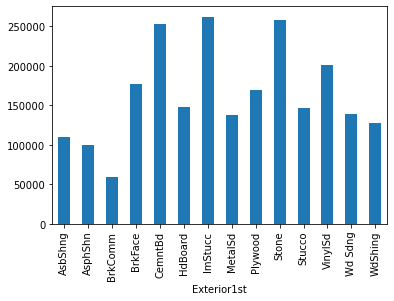

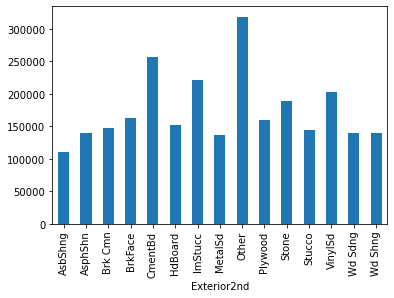

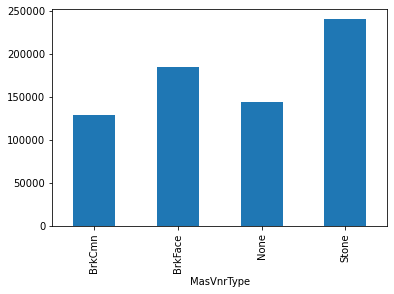

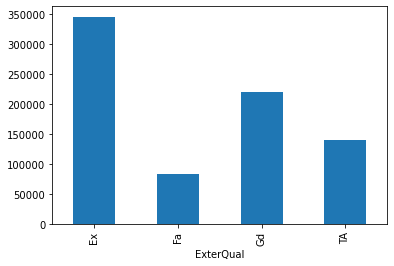

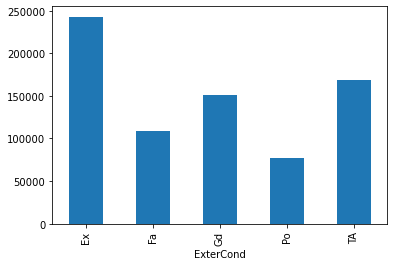

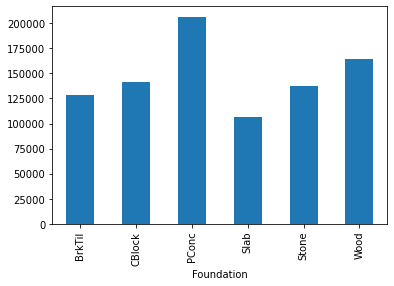

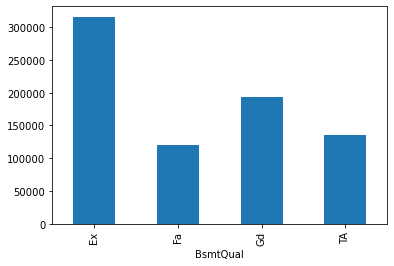

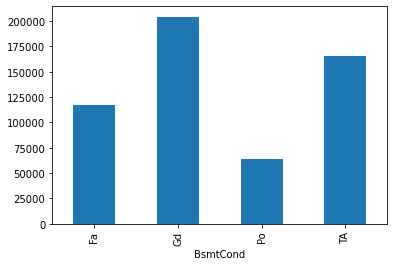

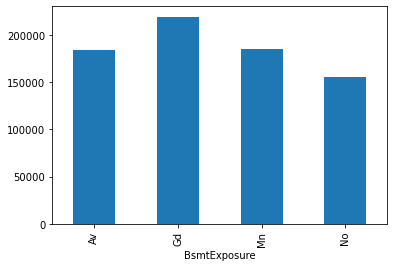

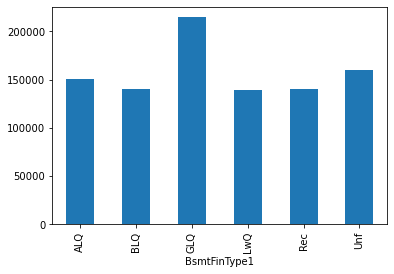

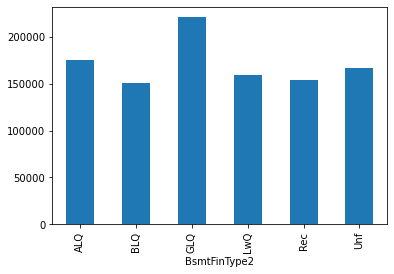

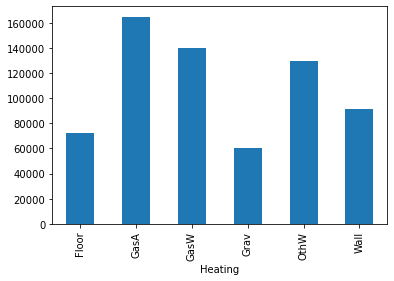

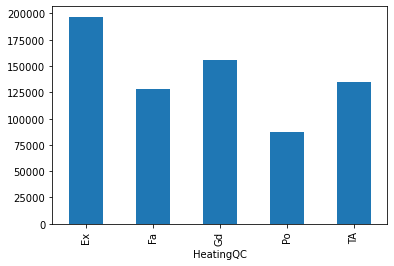

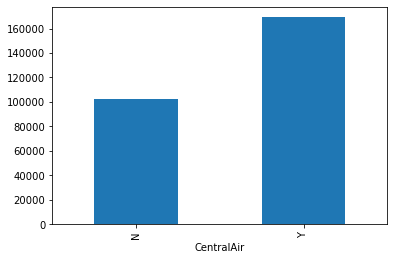

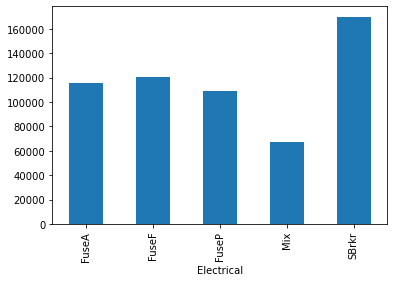

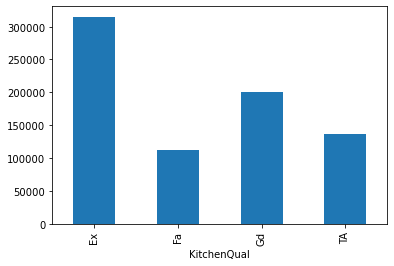

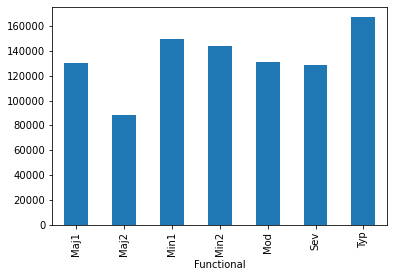

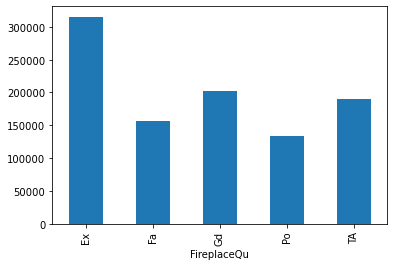

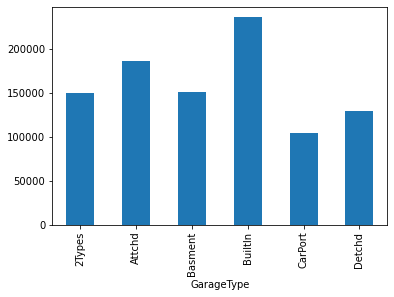

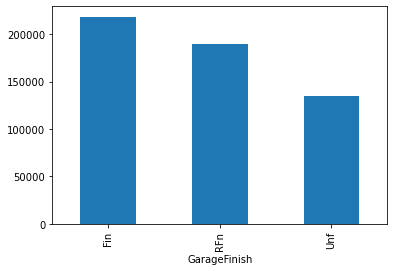

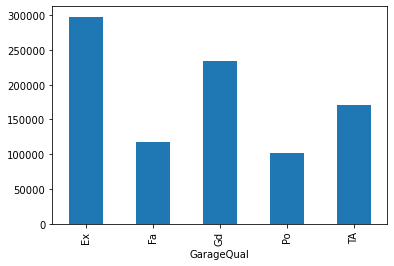

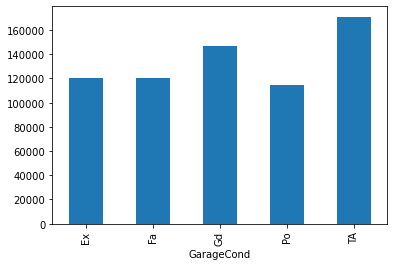

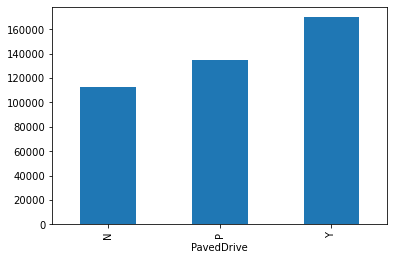

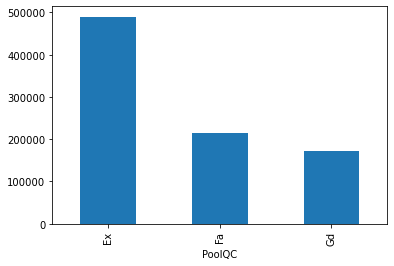

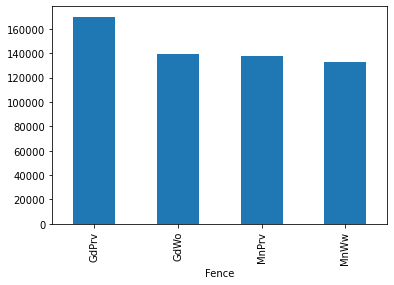

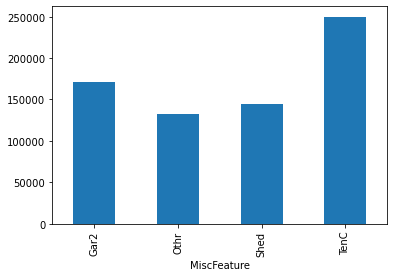

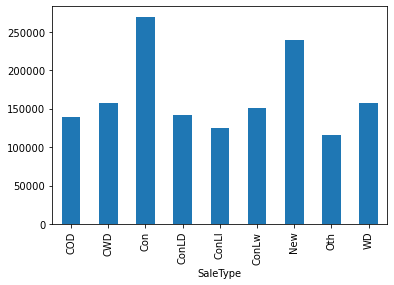

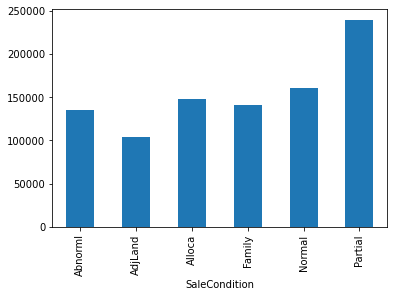

In [61]:
# we will find out the relation between categorical variable and dependent variable

for feature in cat_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

In [62]:
# Handle missing values, we can see the missing values in categorical columns 


cat_naan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in cat_naan:
    print('{}:{}% missing values'.format(feature,np.round(df[feature].isnull().mean(),4)))

Alley:0.9341% missing values
MasVnrType:0.006% missing values
BsmtQual:0.0257% missing values
BsmtCond:0.0257% missing values
BsmtExposure:0.0265% missing values
BsmtFinType1:0.0257% missing values
BsmtFinType2:0.0265% missing values
FireplaceQu:0.4717% missing values
GarageType:0.0548% missing values
GarageFinish:0.0548% missing values
GarageQual:0.0548% missing values
GarageCond:0.0548% missing values
PoolQC:0.994% missing values
Fence:0.7971% missing values
MiscFeature:0.9623% missing values


In [63]:
# replace the null values with new label ,i am creating a new label called 'missing', the result shows no naan values as it
# replaced with a new label missing

def replace_cat_naan(df,cat_naan):
    data=df.copy()
    data[cat_naan]=data[cat_naan].fillna('missing')
    
    return data
df= replace_cat_naan(df,cat_naan)
df[cat_naan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [64]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,missing,missing,missing,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,missing,missing,missing,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,missing,missing,missing,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,missing,MnPrv,missing,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,missing,missing,missing,0,6,2009,WD,Normal,215000


In [65]:
# we will check numeric variables with naan values 

numeric_naan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in numeric_naan:
    print('{}:{}% missing values'.format(feature,np.round(df[feature].isnull().mean(),4)))

LotFrontage:0.1832% missing values
MasVnrArea:0.006% missing values
GarageYrBlt:0.0548% missing values


In [66]:
# will replace naan values of numeric features with median as we observed that there are outliers present in boxplot 
# creating a new feature to capture naan values
# if in this feature we have naan values replace it with 1 otherwise 0

for feature in numeric_naan:
    median_value=df[feature].median()
    
    df[feature+'naan']=np.where(df[feature].isnull(),1,0)
    
    df[feature].fillna(median_value,inplace=True)
    
df[numeric_naan].isnull().sum()    
    
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [67]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenaan,MasVnrAreanaan,GarageYrBltnaan
0,127,120,RL,70.0,4928,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,missing,missing,missing,0,2,2007,WD,Normal,128000,1,0,0
1,889,20,RL,95.0,15865,Pave,missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,missing,missing,missing,0,10,2007,WD,Normal,268000,0,0,0
2,793,60,RL,92.0,9920,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,missing,missing,missing,0,6,2007,WD,Normal,269790,0,0,0
3,110,20,RL,105.0,11751,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,missing,MnPrv,missing,0,1,2010,COD,Normal,190000,0,0,0
4,422,20,RL,70.0,16635,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,missing,missing,missing,0,6,2009,WD,Normal,215000,1,0,0


In [68]:
#handling datetime variables

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature]=df[ 'YrSold']-df[feature]

In [69]:
df.head()
# we can see that the year columns has converted into numeric values 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenaan,MasVnrAreanaan,GarageYrBltnaan
0,127,120,RL,70.0,4928,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,missing,missing,missing,0,2,2007,WD,Normal,128000,1,0,0
1,889,20,RL,95.0,15865,Pave,missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,missing,missing,missing,0,10,2007,WD,Normal,268000,0,0,0
2,793,60,RL,92.0,9920,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,missing,missing,missing,0,6,2007,WD,Normal,269790,0,0,0
3,110,20,RL,105.0,11751,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,missing,MnPrv,missing,0,1,2010,COD,Normal,190000,0,0,0
4,422,20,RL,70.0,16635,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,missing,missing,missing,0,6,2009,WD,Normal,215000,1,0,0


In [70]:
# these numeric feature were skewed so will apply log transformation

num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])

In [71]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenaan,MasVnrAreanaan,GarageYrBltnaan
0,127,120,RL,4.248495,8.502689,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,6.864848,0,0,6.864848,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,missing,missing,missing,0,2,2007,WD,Normal,11.759786,1,0,0
1,889,20,RL,4.553877,9.671871,Pave,missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,7.703910,0,0,7.703910,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,missing,missing,missing,0,10,2007,WD,Normal,12.498742,0,0,0
2,793,60,RL,4.521789,9.202308,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,7.027315,886,0,7.607381,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,missing,missing,missing,0,6,2007,WD,Normal,12.505399,0,0,0
3,110,20,RL,4.653960,9.371694,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,7.519692,0,0,7.519692,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,missing,MnPrv,missing,0,1,2010,COD,Normal,12.154779,0,0,0
4,422,20,RL,4.248495,9.719264,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,7.379008,0,0,7.379008,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,missing,missing,missing,0,6,2009,WD,Normal,12.278393,1,0,0


In [72]:
# handing rare categorical feature
# some categorical features has less than 1% of total so we can ignore them as they will not add much info 
# we can convert then into a new label 

cat_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

cat_feature




['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [73]:
for feature in cat_feature:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'rare_var')

In [74]:
df.head(70)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenaan,MasVnrAreanaan,GarageYrBltnaan
0,127,120,RL,4.248495,8.502689,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,rare_var,Norm,Norm,TwnhsE,1Story,6,5,31,31,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,6.864848,0,0,6.864848,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,30.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,missing,missing,missing,0,2,2007,WD,Normal,11.759786,1,0,0
1,889,20,RL,4.553877,9.671871,Pave,missing,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,37,37,Flat,rare_var,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,7.703910,0,0,7.703910,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,37.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,missing,missing,missing,0,10,2007,WD,Normal,12.498742,0,0,0
2,793,60,RL,4.521789,9.202308,Pave,missing,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,11,10,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,7.027315,886,0,7.607381,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,10.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,missing,missing,missing,0,6,2007,WD,Normal,12.505399,0,0,0
3,110,20,RL,4.653960,9.371694,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,33,33,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,7.519692,0,0,7.519692,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,33.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,missing,MnPrv,missing,0,1,2010,COD,Normal,12.154779,0,0,0
4,422,20,RL,4.248495,9.719264,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,32,9,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,7.379008,0,0,7.379008,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,32.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,missing,missing,missing,0,6,2009,WD,Normal,12.278393,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,878,60,RL,4.304065,9.086363,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,5,4,Hip,CompShg,VinylSd,VinylSd,Stone,216.0,Gd,TA,PConc,Ex,TA,No,GLQ,1170,Unf,0,292,1462,GasA,Ex,Y,SBrkr,7.287561,762,0,7.707063,1,0,2,1,4,1,Ex,10,Typ,1,Gd,Attchd,5.0,Fin,3,738,TA,TA,Y,184,0,0,0,0,0,missing,missing,missing,0,6,2009,WD,Normal,12.765688,0,0,0
66,264,50,RM,3.912023,8.612503,Pave,missing,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,7,81,9,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,234,ALQ,692,0,926,GasA,TA,Y,SBrkr,6.830874,0,390,7.182352,1,0,1,0,3,1,TA,6,Typ,0,missing,Detchd,36.0,Unf,2,484,TA,TA,Y,0,0,0,0,0,0,missing,missing,missing,0,4,2010,WD,Normal,11.775290,0,0,0
67,1253,20,RL,4.127134,9.196039,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,6,41,41,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,510,Unf,0,354,864,GasA,TA,Y,SBrkr,6.773080

In [75]:
for feature in cat_feature:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [76]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenaan,MasVnrAreanaan,GarageYrBltnaan
0,127,120,3,4.248495,8.502689,1,2,1,1,0,1,1,4,2,1,4,3,6,5,31,31,1,0,7,6,1,0.0,1,3,2,3,3,1,4,120,4,0,958,1078,2,2,1,3,6.864848,0,0,6.864848,0,0,2,0,2,1,1,5,4,1,3,4,30.0,2,2,440,2,3,2,0,205,0,0,0,0,0,3,1,0,2,2007,2,4,11.759786,1,0,0
1,889,20,3,4.553877,9.671871,1,2,1,1,0,1,0,7,2,1,3,3,8,6,37,37,3,1,1,2,1,0.0,2,2,4,2,4,4,4,351,2,823,1043,2217,2,4,1,3,7.703910,0,0,7.703910,1,0,2,0,4,1,2,8,4,1,3,4,37.0,1,2,621,2,3,2,81,207,0,0,224,0,0,3,1,0,10,2007,2,4,12.498742,0,0,0
2,793,60,3,4.521789,9.202308,1,2,1,1,0,4,1,20,2,1,3,6,7,5,11,10,1,0,2,1,1,0.0,2,3,4,3,3,3,6,862,4,0,255,1117,2,4,1,3,7.027315,886,0,7.607381,1,0,2,1,3,1,1,8,4,1,3,4,10.0,1,2,455,2,3,2,180,130,0,0,0,0,0,3,1,0,6,2007,2,4,12.505399,0,0,0
3,110,20,3,4.653960,9.371694,1,2,1,1,0,1,1,10,2,1,3,3,6,6,33,33,2,0,7,6,2,480.0,1,3,2,3,3,1,3,705,4,0,1139,1844,2,4,1,3,7.519692,0,0,7.519692,0,0,2,0,3,1,1,7,4,1,3,4,33.0,2,2,546,2,3,2,0,122,0,0,0,0,0,2,1,0,1,2010,0,4,12.154779,0,0,0
4,422,20,3,4.248495,9.719264,1,2,1,1,0,0,1,10,2,1,3,3,6,7,32,9,1,0,10,10,4,126.0,2,3,2,3,3,1,4,1246,4,0,356,1602,2,3,1,3,7.379008,0,0,7.379008,0,1,2,0,3,1,2,8,4,1,3,4,32.0,3,2,529,2,3,2,240,0,0,0,0,0,0,3,1,0,6,2009,2,4,12.278393,1,0,0


In [77]:
# feature scalling 


from sklearn.preprocessing import MinMaxScaler



In [78]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]


scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [79]:
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [80]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenaan,MasVnrAreanaan,GarageYrBltnaan
0,127,11.759786,0.588235,0.75,0.445638,0.275238,1.0,1.0,0.333333,0.333333,0.0,0.25,0.5,0.20,0.4,1.0,1.00,0.5,0.555556,0.500,0.229630,0.524590,0.333333,0.0,0.7,0.6,0.25,0.00000,0.333333,1.000000,0.5,0.75,0.75,0.25,0.666667,0.021262,0.666667,0.000000,0.410103,0.176432,1.0,0.50,1.0,1.0,0.398758,0.000000,0.0,0.372749,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.333333,0.6,0.8,0.280374,0.666667,0.5,0.310296,0.666667,1.0,1.0,0.000000,0.374771,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.0,0.090909,0.25,0.666667,0.8,1.0,0.0,0.0
1,889,12.498742,0.000000,0.75,0.558672,0.516729,1.0,1.0,0.333333,0.333333,0.0,0.25,0.0,0.35,0.4,1.0,0.75,0.5,0.777778,0.625,0.274074,0.622951,1.000000,1.0,0.1,0.2,0.25,0.00000,0.666667,0.666667,1.0,0.50,1.00,1.00,0.666667,0.062190,0.333333,0.558345,0.446490,0.362848,1.0,1.00,1.0,1.0,0.716287,0.000000,0.0,0.669568,0.333333,0.0,0.666667,0.0,0.500,0.333333,0.666667,0.500000,1.0,0.333333,0.6,0.8,0.345794,0.333333,0.5,0.437941,0.666667,1.0,1.0,0.094516,0.378428,0.0,0.0,0.466667,0.0,0.0,0.75,0.5,0.0,0.818182,0.25,0.666667,0.8,0.0,0.0,0.0
2,793,12.505399,0.235294,0.75,0.546795,0.419742,1.0,1.0,0.333333,0.333333,0.0,1.00,0.5,1.00,0.4,1.0,0.75,1.0,0.666667,0.500,0.081481,0.180328,0.333333,0.0,0.2,0.1,0.25,0.00000,0.666667,1.000000,1.0,0.75,0.75,0.75,1.000000,0.152729,0.666667,0.000000,0.109161,0.182815,1.0,1.00,1.0,1.0,0.460241,0.429056,0.0,0.635421,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.500000,1.0,0.333333,0.6,0.8,0.093458,0.333333,0.5,0.320874,0.666667,1.0,1.0,0.210035,0.237660,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.0,0.454545,0.25,0.666667,0.8,0.0,0.0,0.0
3,110,12.154779,0.000000,0.75,0.595717,0.454728,1.0,1.0,0.333333,0.333333,0.0,0.25,0.5,0.50,0.4,1.0,0.75,0.5,0.555556,0.625,0.244444,0.557377,0.666667,0.0,0.7,0.6,0.50,0.30000,0.333333,1.000000,0.5,0.75,0.75,0.25,0.500000,0.124911,0.666667,0.000000,0.487586,0.301800,1.0,1.00,1.0,1.0,0.646573,0.000000,0.0,0.604401,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.6,0.8,0.308411,0.666667,0.5,0.385049,0.666667,1.0,1.0,0.000000,0.223035,0.0,0.0,0.000000,0.0,0.0,0.50,0.5,0.0,0.000000,1.00,0.000000,0.8,0.0,0.0,0.0
4,422,12.278393,0.000000,0.75,0.445638,0.526518,1.0,1.0,0.333333,0.333333,0.0,0.00,0.5,0.50,0.4,1.0,0.75,0.5,0.555556,0.750,0.237037,0.163934,0.333333,0.0,1.0,1.0,1.00,0.07875,0.666667,1.000000,0.5,0.75,0.75,0.25,0.666667,0.220765,0.666667,0.000000,0.152397,0.262193,1.0,0.75,1.0,1.0,0.593333,0.000000,0.0,0.554633,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.666667,0.500000,1.0,0.333333,0.6,0.8,0.299065,1.000000,0.5,0.373061,0.666667,1.0,1.0,0.280047,0.000000,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.0,0.454545,0.75,0.666667,0.8,1.0,0.0,0.0


In [81]:
x=df.drop('SalePrice',axis=1)

In [82]:
y=df['SalePrice']

In [83]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [76]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # selecting the best features 
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [77]:
feature_sel_model.get_support()
                                   # true means we should use that feature and false means we should not 

array([ True,  True,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True, False, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False])

In [78]:
# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 83
selected features: 47


NameError: name 'sel_' is not defined

In [79]:
selected_feat
              # these are the list of important features 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtFullBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'SaleCondition'],
      dtype='object')

# APPLYING LINEAR REGRESSION 

In [84]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)


In [85]:
score=lr.score(x_train,y_train)
score

0.9078704764156471

In [86]:
from sklearn.metrics import r2_score
print(r2_score(y_test,lrpred))

0.9032805944217575


In [87]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lrpred))
print('MSE:', metrics.mean_squared_error(y_test,lrpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lrpred)))

MAE: 0.09040802162750067
MSE: 0.016161272436993463
RMSE: 0.12712699334521155


In [88]:
# Applying k fold val to check if the model is overfitting 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
model=LinearRegression()
Kfold_val=KFold(10)

result=cross_val_score(model,x,y,cv=Kfold_val)

print(result)
print(np.mean(result))

[0.93858832 0.88656724 0.89756793 0.78609364 0.9031037  0.7021189
 0.88264111 0.91654286 0.88266981 0.8266532 ]
0.8622546715350247


# APPLYING RANDOM FOREST 

In [89]:


from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
rdrpred=rdr.predict(x_test)

In [90]:
rdr.score(x_train,y_train)

0.9808045064058601

In [91]:
from sklearn.metrics import r2_score
print(r2_score(y_test,rdrpred))

0.8822679552722557


In [101]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rdrpred))
print('MSE:', metrics.mean_squared_error(y_test,rdrpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rdrpred)))

MAE: 0.09631588855160013
MSE: 0.019559694520263574
RMSE: 0.13985597777808276


In [102]:
# Applying k fold val to check if the model is overfitting 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
model=RandomForestRegressor()
Kfold_val=KFold(10)

result=cross_val_score(model,x,y,cv=Kfold_val)

print(result)
print(np.mean(result))

[0.8848699  0.89700233 0.88643343 0.83453495 0.90384453 0.81457363
 0.87045292 0.89538534 0.84555024 0.81577318]
0.8648420456222276


In [103]:
# Hyper parameter tuning ,i am using randomised search first 


from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)




{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [104]:
#rdr=RandomForestRegressor()
#rdr_randomcv=RandomizedSearchCV(estimator=rdr,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

#rdr_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [105]:
rdr_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780}

In [74]:
best_param=rdr_randomcv.best_estimator_

In [75]:
ypred=best_param.predict(x_test)

print(r2_score(y_test,ypred))

0.8695008974194136


In [83]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    
    'max_depth': [rdr_randomcv.best_params_['max_depth']],
    'max_features': [rdr_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rdr_randomcv.best_params_['min_samples_leaf']], 
                         
    'min_samples_split':[rdr_randomcv.best_params_['min_samples_split'] ],
                          
    'n_estimators': [rdr_randomcv.best_params_['n_estimators'] - 200, rdr_randomcv.best_params_['n_estimators'] - 100, 
                     rdr_randomcv.best_params_['n_estimators'], 
                     rdr_randomcv.best_params_['n_estimators'] + 100, rdr_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'max_depth': [780], 'max_features': ['sqrt'], 'min_samples_leaf': [1], 'min_samples_split': [2], 'n_estimators': [1200, 1300, 1400, 1500, 1600]}


In [84]:
#rdr=RandomForestRegressor()
#grid_search=GridSearchCV(estimator=rdr,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
#grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [780], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [1200, 1300, 1400, 1500, 1600]},
             verbose=2)

In [85]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=780, max_features='sqrt', n_estimators=1500)

In [86]:
best_grid=grid_search.best_estimator_

In [88]:
ypred=best_grid.predict(x_test)


In [89]:
print(r2_score(y_test,ypred))

0.8699711863942178


In [96]:
# SAVING THE BEST MODEL 


import  pickle as pk
file=open('house_price.pkl','wb')
pk.dump(lrpred,file)

# TEST DATA 

In [104]:
test_df=pd.read_csv('flip_house_test.csv')

In [105]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [106]:
test_df.shape

(292, 80)

In [107]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [108]:
test_df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [8]:
# This shows the percentage of naan values in the columns 


col_with_na=[col for col in df1.columns if test_df[col].isnull().sum()>1]

for col in col_with_na:
    print(col,np.round(test_df[col].isnull().mean(),4),'% missing values')

LotFrontage 0.1541 % missing values
Alley 0.9521 % missing values
BsmtQual 0.024 % missing values
BsmtCond 0.024 % missing values
BsmtExposure 0.024 % missing values
BsmtFinType1 0.024 % missing values
BsmtFinType2 0.024 % missing values
FireplaceQu 0.476 % missing values
GarageType 0.0582 % missing values
GarageYrBlt 0.0582 % missing values
GarageFinish 0.0582 % missing values
GarageQual 0.0582 % missing values
GarageCond 0.0582 % missing values
PoolQC 1.0 % missing values
Fence 0.8493 % missing values
MiscFeature 0.9658 % missing values


In [110]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())


In [113]:
test_df.drop(['Alley'],inplace=True,axis=1)

In [114]:
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])

In [115]:
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)

test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])

test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_df.shape

(292, 75)

<AxesSubplot:>

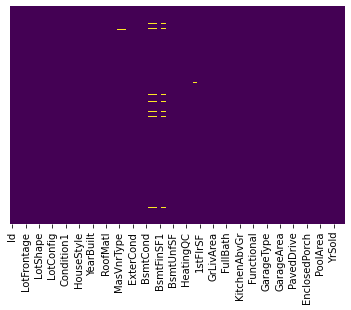

In [116]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [117]:
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])


<AxesSubplot:>

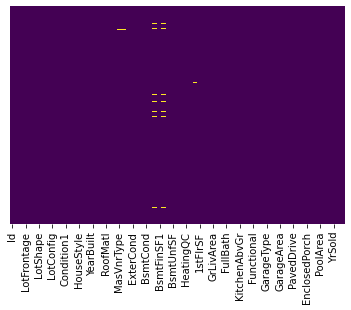

In [118]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [119]:
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])


In [120]:
test_df.loc[:, test_df.isnull().any()].head()


,MasVnrType,MasVnrArea,BsmtFinType1,Electrical
0,Stone,200.0,GLQ,SBrkr
1,None,0.0,GLQ,SBrkr
2,None,0.0,Unf,SBrkr
3,None,0.0,Rec,SBrkr
4,Stone,74.0,Unf,SBrkr


In [ ]:
LotFrontage 0.1541 % missing values
Alley 0.9521 % missing values
BsmtQual 0.024 % missing values
BsmtCond 0.024 % missing values
BsmtExposure 0.024 % missing values
BsmtFinType1 0.024 % missing values
BsmtFinType2 0.024 % missing values
FireplaceQu 0.476 % missing values
GarageType 0.0582 % missing values
GarageYrBlt 0.0582 % missing values
GarageFinish 0.0582 % missing values
GarageQual 0.0582 % missing values
GarageCond 0.0582 % missing values
PoolQC 1.0 % missing values
Fence 0.8493 % missing values
MiscFeature 0.9658 % missing values

In [121]:
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])


In [122]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.000000,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,0,7,2007,WD,Normal
1,1018,120,RL,66.425101,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,0,8,2009,COD,Abnorml
2,929,20,RL,66.425101,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,0,6,2009,WD,Normal
3,1148,70,RL,75.000000,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,0,7,2009,WD,Normal
4,1227,60,RL,86.000000,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,0,1,2008,WD,Normal


In [125]:
## we find out the categorical features 


cat_features=[feature for feature in test_df.columns if test_df[feature].dtypes=='O']

cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [129]:
#handling datetime variables

for feature in ['YearBuilt', 'YearRemodAdd']:
    test_df[feature]=test_df[ 'YrSold']-test_df[feature]

In [130]:
test_df.head()
# we can see that the year columns has converted into numeric values 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.000000,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,0,7,2007,WD,Normal
1,1018,120,RL,66.425101,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,0,8,2009,COD,Abnorml
2,929,20,RL,66.425101,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,0,6,2009,WD,Normal
3,1148,70,RL,75.000000,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,0,7,2009,WD,Normal
4,1227,60,RL,86.000000,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,0,1,2008,WD,Normal


In [131]:
# handing rare categorical feature
# some categorical features has less than 1% of total so we can ignore them as they will not add much info 
# we can convert then into a new label 

cat_feature=[feature for feature in test_df.columns if test_df[feature].dtypes=='O']

cat_feature



['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [133]:
 cat_feature = test_df.select_dtypes(['object']).columns

#convert all categorical variables to numeric
test_df[cat_feature] = test_df[cat_feature].apply(lambda x: pd.factorize(x)[0])
    

In [134]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,0,86.000000,14157,0,0,0,0,0,0,0,0,0,0,0,9,5,2005,2006,0,0,0,0,0,200.0,0,0,0,0,0,0,0,1249,0,0,673,1922,0,0,0,0,1922,0,0,1922,1,0,2,0,3,1,0,8,0,1,0,0,0,3,676,0,0,0,178,51,0,0,0,0,0,7,2007,0,0
1,1018,120,0,66.425101,5814,0,0,1,0,1,0,0,0,0,1,0,8,5,1984,1984,1,0,1,1,1,0.0,0,0,1,1,0,1,0,1036,0,0,184,1220,0,1,0,0,1360,0,0,1360,1,0,1,0,1,1,0,4,0,1,1,0,1,2,565,0,0,0,63,0,0,0,0,0,0,8,2009,1,1
2,929,20,0,66.425101,11838,0,1,1,0,2,0,1,0,0,0,0,8,5,2001,2001,0,0,0,0,1,0.0,0,0,0,1,0,1,1,0,0,0,1753,1753,0,0,0,0,1788,0,0,1788,0,0,2,0,3,1,1,7,0,1,2,0,1,2,522,0,0,0,202,151,0,0,0,0,0,6,2009,0,0
3,1148,70,0,75.000000,12000,0,1,2,0,2,0,2,0,0,0,1,7,7,1941,1950,1,0,2,2,1,0.0,1,0,1,2,0,2,2,275,0,0,429,704,0,0,0,0,860,704,0,1564,0,0,1,1,3,1,2,7,0,1,0,0,2,1,234,0,0,0,0,0,0,0,0,0,0,7,2009,0,0
4,1227,60,0,86.000000,14598,0,0,1,0,1,0,3,1,0,0,1,6,5,2007,2007,1,0,0,0,0,74.0,0,0,0,1,0,3,1,0,0,0,894,894,0,0,0,0,894,1039,0,1933,0,0,2,1,4,1,0,9,0,1,0,1,0,3,668,0,0,0,100,18,0,0,0,0,0,1,2008,0,0


In [135]:
# feature scalling 


from sklearn.preprocessing import MinMaxScaler



In [136]:
feature_scale=[feature for feature in test_df.columns if feature not in ['Id']]


scaler=MinMaxScaler()
scaler.fit_transform(test_df[feature_scale])

array([[0.        , 0.        , 0.50387597, ..., 0.25      , 0.        ,
        0.        ],
       [0.58823529, 0.        , 0.35213257, ..., 0.75      , 0.2       ,
        0.33333333],
       [0.        , 0.        , 0.35213257, ..., 0.75      , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.35213257, ..., 1.        , 0.        ,
        0.        ],
       [0.17647059, 0.33333333, 0.2248062 , ..., 0.        , 0.        ,
        0.        ],
       [0.82352941, 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [137]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,0,86.000000,14157,0,0,0,0,0,0,0,0,0,0,0,9,5,2005,2006,0,0,0,0,0,200.0,0,0,0,0,0,0,0,1249,0,0,673,1922,0,0,0,0,1922,0,0,1922,1,0,2,0,3,1,0,8,0,1,0,0,0,3,676,0,0,0,178,51,0,0,0,0,0,7,2007,0,0
1,1018,120,0,66.425101,5814,0,0,1,0,1,0,0,0,0,1,0,8,5,1984,1984,1,0,1,1,1,0.0,0,0,1,1,0,1,0,1036,0,0,184,1220,0,1,0,0,1360,0,0,1360,1,0,1,0,1,1,0,4,0,1,1,0,1,2,565,0,0,0,63,0,0,0,0,0,0,8,2009,1,1
2,929,20,0,66.425101,11838,0,1,1,0,2,0,1,0,0,0,0,8,5,2001,2001,0,0,0,0,1,0.0,0,0,0,1,0,1,1,0,0,0,1753,1753,0,0,0,0,1788,0,0,1788,0,0,2,0,3,1,1,7,0,1,2,0,1,2,522,0,0,0,202,151,0,0,0,0,0,6,2009,0,0
3,1148,70,0,75.000000,12000,0,1,2,0,2,0,2,0,0,0,1,7,7,1941,1950,1,0,2,2,1,0.0,1,0,1,2,0,2,2,275,0,0,429,704,0,0,0,0,860,704,0,1564,0,0,1,1,3,1,2,7,0,1,0,0,2,1,234,0,0,0,0,0,0,0,0,0,0,7,2009,0,0
4,1227,60,0,86.000000,14598,0,0,1,0,1,0,3,1,0,0,1,6,5,2007,2007,1,0,0,0,0,74.0,0,0,0,1,0,3,1,0,0,0,894,894,0,0,0,0,894,1039,0,1933,0,0,2,1,4,1,0,9,0,1,0,1,0,3,668,0,0,0,100,18,0,0,0,0,0,1,2008,0,0


In [98]:
prediction=pk.load(open('house_price.pkl','rb'))

In [ ]:
y_pred = lr.predict(test_df)